# **Customer Churn**

The objective of this project is to develop a predictive machine learning model that identifies customers with a high probability of terminating their subscriptions. By analyzing historical behavior—including usage patterns, demographics, and support interactions—the model will provide a binary classification output ($1$ for churn, $0$ for retention) and a probability score to prioritize intervention efforts.

# **Life cycle of Machine learning Project**

Understanding the Problem Statement

Data Collection

Data Checks to perform

Exploratory data analysis

Data Pre-Processing

Model Training

Choose best model

# 1)   **Problem Statement**

Customer churn is a critical bottleneck to sustainable growth, as the cost of acquiring new customers significantly exceeds the cost of retaining existing ones. This project aims to transform the company's retention strategy from reactive (waiting for a customer to leave) to proactive (identifying risk early).

# 2) **Data Collection**

Dataset : https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

**2.1 Import Data and Required Packages**

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv('data/Telecom_churn.csv')

**Show Top 5 Records**

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Shape of the dataset**

In [4]:
df.shape

(3333, 20)

**2.2 Dataset information**

The dataset used for this project is a Telecom Churn Dataset, containing information about 3,333 customers. Each row represents a unique customer, and the columns represent various usage metrics and account details used to predict whether a customer will leave the service.

State : US state code -> (KS, OH, NJ, OK, AL, MA, MO, LA, WV, IN, etc.)

Account length : Duration the account has been active -> (1 to 243)

Area code : Telephone area code -> (408, 415, 510)

International plan : Has an international calling plan -> (Yes, No)

Voice mail plan : Has a voice mail plan -> (Yes, No)

Number vmail messages : Number of voice mail messages -> (0 to 51)

Total day minutes : Total minutes used during the day -> (0.0 to 350.8)

Total day calls : Total number of calls made during the day -> (0 to 165)

Total day charge : Total charges for day calls -> (0.0 to 59.64)

Total eve minutes : Total minutes used during the evening -> (0.0 to 363.7)

Total eve calls : Total number of calls made during the evening -> (0 to 170)

Total eve charge : Total charges for evening calls -> (0.0 to 30.91)

Total night minutes : Total minutes used during the night -> (23.2 to 395.0)

Total night calls : Total number of calls made during the night -> (33 to 175)

Total night charge : Total charges for night calls -> (1.04 to 17.77)

Total intl minutes : Total international minutes used -> (0.0 to 20.0)

Total intl calls : Total number of international calls -> (0 to 20)

Total intl charge : Total charges for international calls -> (0.0 to 5.4)

Customer service calls : Number of calls made to customer service -> (0 to 9)

Churn : Whether the customer canceled their service -> (False, True)

# **3. Data Checks to perform**

Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

**3.1 Check Missing values**

In [5]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

**3.2 Check Duplicates**

In [6]:
df.duplicated().sum()

np.int64(0)

**There are no duplicates values in the data set**

**3.3 Check data types**

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**3.4 Checking the number of unique values of each column**

In [8]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

**3.5 Check statistics of data set**

In [9]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**3.6 Exploring Data**

In [10]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Converting from Boolean to numbers**

In [11]:
# Convert Yes/No and True/False to 1/0
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [12]:
# Key insight: Threshold for Customer Service Calls
df.pivot_table(values='Churn', index='Customer service calls', aggfunc='mean')

,Churn
Customer service calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


**Customer Service Calls: If $> 3$, churn risk triples**

In [13]:
# Key insight: Churn rate based on International Plan
pd.crosstab(df['Churn'], df['International plan'], normalize='index')

International plan,0,1
Churn,,
False,0.934737,0.065263
True,0.716356,0.283644


**Intl Plan: Customers with this plan churn at a much higher rate.**

# **4. Exploring Data ( Visualization )**

**4.1 Quantitative features**

**Univariate Analysis (The "Distribution")**

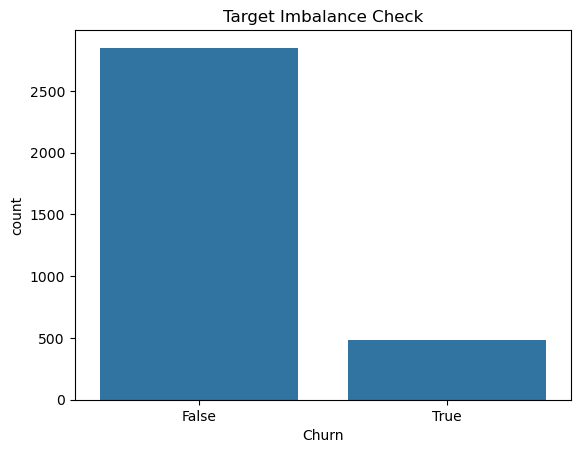

In [14]:
sns.countplot(x='Churn', data=df)
plt.title('Target Imbalance Check')
plt.show()

**Insight** : Data is imbalanced

**4.2 Bivariate Analysis (The "Drivers")**

Boxplots are the professional choice here. They show you the median usage and the "outliers" (the extreme users).

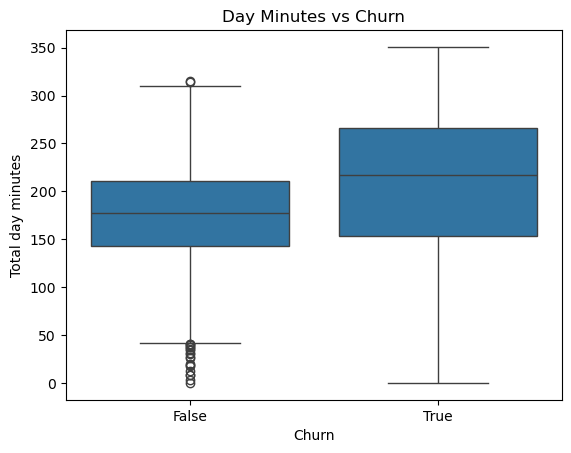

In [15]:
# Does high usage lead to churn?
sns.boxplot(x='Churn', y='Total day minutes', data=df)
plt.title('Day Minutes vs Churn')
plt.show()

Churned users (Churn = 1) have a clearly higher median of total day minutes than non-churned users.

**Insight** : heavy daytime callers are more likely to churn.

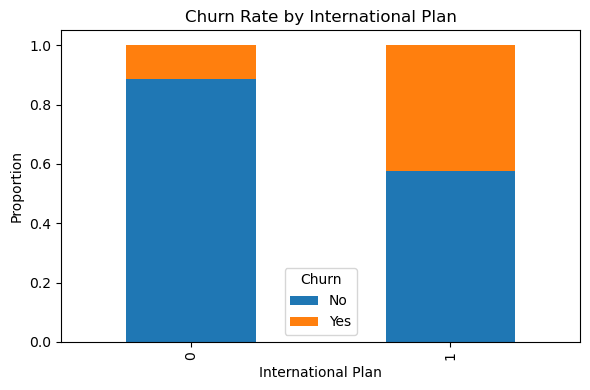

In [16]:
# Prepare crosstab with proportions
ct = pd.crosstab(df['International plan'], df['Churn'], normalize='index')

# Plot stacked bar chart
ct.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4)
)

plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Proportion')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

**Insight** : Customers with an International Plan churn at a much higher rate

**Grouped Boxplot — Customer Service Calls vs Churn (PRIMARY)**

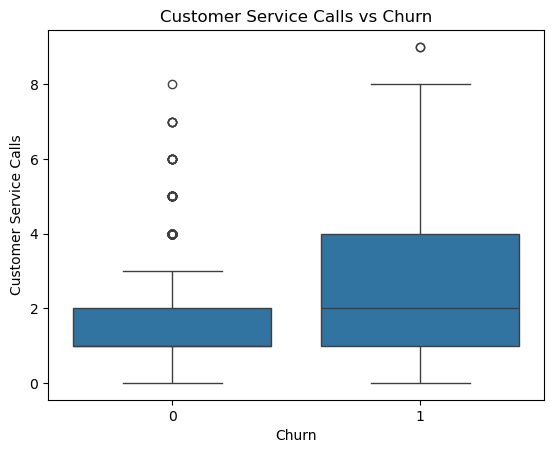

In [17]:
df['Customer service calls'] = pd.to_numeric(
    df['Customer service calls'], errors='coerce'
)
df['Churn'] = df['Churn'].astype(int)

eda_df = df[['Churn', 'Customer service calls']].dropna()

sns.boxplot(
    x='Churn',
    y='Customer service calls',
    data=eda_df
)

plt.title('Customer Service Calls vs Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

**Insight** : Churned customers contact customer service significantly more

**KDE Plot — Distribution Shift (SECONDARY, SUPPORTING)**

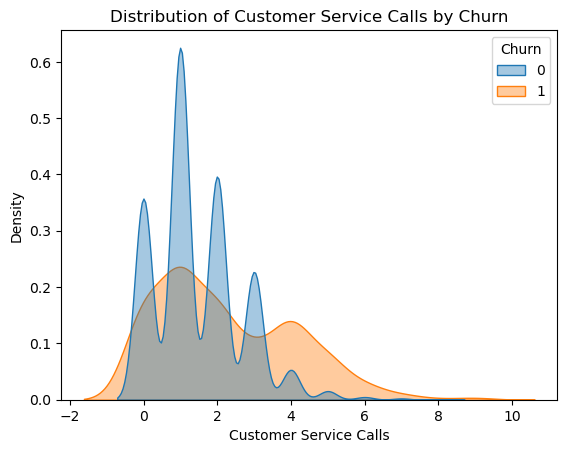

In [18]:
sns.kdeplot(
    data=eda_df,
    x='Customer service calls',
    hue='Churn',
    common_norm=False,
    fill=True,
    alpha=0.4
)

plt.title('Distribution of Customer Service Calls by Churn')
plt.xlabel('Customer Service Calls')
plt.show()


**Insighht** : KDE shows sharp right-shift for churned users

**Multivariate Analysis**

**Correlation Audit (The "Redundancy" Check)**

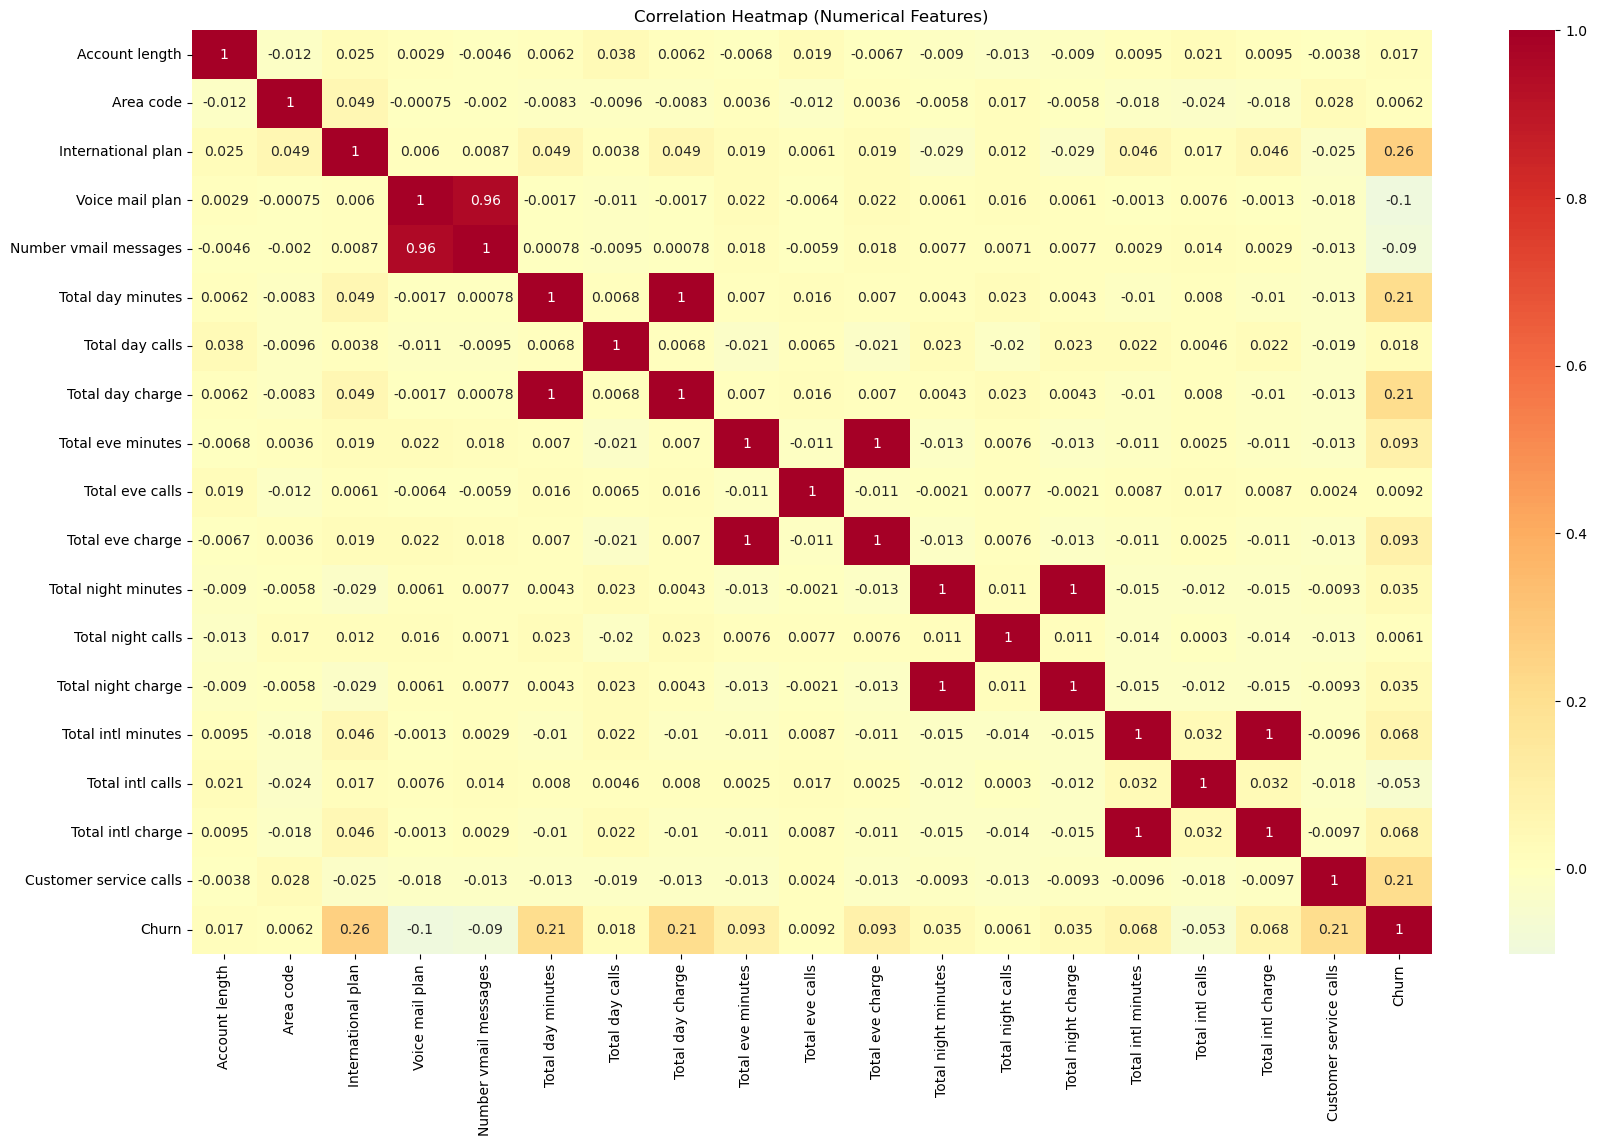

In [19]:
# Select only numeric columns
num_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr = num_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(
    corr,
    annot=True,
    cmap='RdYlBu_r',
    center=0
)

plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

**Insights** : Usage & Charges are almost perfectly correlated

# **5. Conclusions**

**Key Insights on Churn Drivers**

**Imbalanced Target:** Churn is underrepresented, which could lead to biased models favoring non-churn predictions. Techniques like oversampling or class weighting may be needed during modeling.

**Usage Patterns and Churn:** Heavy daytime callers (higher median total day minutes) are more likely to churn. This suggests dissatisfaction with daytime service or pricing.
Total usage (minutes and calls) correlates strongly with charges, but charges themselves don't directly drive churn—usage does.

**Plan and Service Factors:** Customers with an International Plan churn at a much higher rate (over 40% vs. ~11% without). This is a strong predictor and could indicate plan dissatisfaction or higher costs.
Voice mail plan shows minimal impact on churn.

**Customer Service Interactions:** Churned customers make significantly more customer service calls (median higher, with a right-shift in distribution). A threshold of >3 calls triples churn risk, pointing to unresolved issues as a key trigger.

**Geographic Influence:** Churn rates vary by state (e.g., some states like NJ or TX show higher rates). This suggests regional factors (e.g., competition, service quality) play a role.

**Correlations and Redundancy:** Usage features (e.g., day/eve/night minutes) are highly correlated with their respective charges (near-perfect correlation), indicating redundancy. Total minutes and calls (newly engineered features) could simplify the model by aggregating these.

**Limitations**
- EDA now includes multivariate analysis (e.g., scatter plots and pair plots for engineered features), but deeper techniques like PCA could reveal more hidden patterns.
- No temporal analysis was done, so trends over account length aren't explored.